# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_validate
from sklearn.inspection import permutation_importance
from  sklearn  import  set_config
set_config(display='diagram')

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, VotingRegressor
from sklearn.dummy import DummyRegressor

# Custom functions

In [4]:
def regrerssion_performance(model, X, y):
    y_pred = model.predict(X)
    r2 = round(r2_score(y, y_pred),3)
    mse = round(mean_squared_error(y, y_pred))
    mae = round(mean_absolute_error(y, y_pred))
    return pd.DataFrame({'model':[str(model)], 'R2':[r2], 'mean_absolute_error':[mae], 'mean_square_error':[mse]})

In [5]:
def regression_analysis(df):
    df['model'] = df['model'].apply(lambda x: x.split('(')[0])    
    fig, axs = plt.subplots(1, 3, figsize=(20, 5))

    sns.barplot( x ='model', y='R2', data=df, ax=axs[0])
    axs[0].set_ylim(0, 1)
    axs[0].set_xlabel('')
    axs[0].set_ylabel('R2', fontsize=18)
    plt.setp(axs[0].get_xticklabels(), rotation=60, fontsize=13)
    plt.setp(axs[0].get_yticklabels(), fontsize=12)
    axs[0].grid(axis='y', linestyle='--', linewidth=0.8)

    sns.barplot( x ='model', y='mean_absolute_error', data=df, ax=axs[1])
    axs[1].set_xlabel('')
    axs[1].set_ylabel('MAE', fontsize=18)
    plt.setp(axs[1].get_xticklabels(), rotation=60, fontsize=13)
    plt.setp(axs[1].get_yticklabels(), fontsize=12)
    axs[1].grid(axis='y', linestyle='--', linewidth=0.8)

    sns.barplot( x ='model', y='mean_square_error', data=df, ax=axs[2])
    axs[2].set_xlabel('')
    axs[2].set_ylabel('MQE', fontsize=18)
    plt.setp(axs[2].get_xticklabels(), rotation=60, fontsize=13)
    plt.setp(axs[2].get_yticklabels(), fontsize=12)
    axs[2].grid(axis='y', linestyle='--', linewidth=0.8)

    plt.show()
    return df

In [6]:
def features_importance(model, X_test, y_test, n_repeats):
    result = permutation_importance(estimator=model,X=X_test, y=y_test, n_repeats=n_repeats, n_jobs=-1, random_state=13)
    features_rank  = pd.DataFrame(result['importances'].T,  columns=data_frame.columns[:-1])
    
    plt.figure(figsize=(10, 7))
    plt.title(str(model))
    plt.grid(axis='x', linestyle='--', linewidth=0.8)
    sns.barplot(data=features_rank, orient='h')
    
    return  plt.show()

In [7]:
def cross_validation(model, X, y, cv):
    r = cross_validate(model, X, y, cv=cv, scoring=('r2'), return_train_score=True, n_jobs=-1)
    r2_test_mean = round(r['test_score'].mean(),3)
    r2_train_mean = round(r['train_score'].mean(),3)
    r2_test_min = round(r['test_score'].min(),3)
    r2_train_min = round(r['train_score'].min(),3)
    r2_test_max = round(r['test_score'].max(),3)
    r2_train_max = round(r['train_score'].max(),3)    
    data = pd.DataFrame(r)
    data = data[['test_score', 'train_score']]
    
    sns.barplot(data=data)
    plt.grid(axis='y', linestyle='--', linewidth=0.8)
    plt.yticks(np.arange(0, 1.1, 0.1))
    plt.ylabel('R2')
   
    print('test R2 score: worst={0}, best={1}, avarage={2}'.format(r2_test_min,r2_test_max,r2_test_mean))
    print('train R2 score: worst={0}, best={1}, avarage={2}'.format(r2_train_min,r2_train_max,r2_train_mean))
   
    return plt.show()

# Loading data

In [8]:
with open('diamonds_dataset.pkl', 'rb') as f:
    data = pickle.load(f)

In [9]:
X, y = data

In [10]:
with open('diamonds_df_processed.pkl', 'rb') as f:
    data_frame = pickle.load(f)

In [11]:
df = data_frame

In [12]:
df

,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,...,clarity_VS2,clarity_VVS1,clarity_VVS2,carat,depth,table,x,y,z,price
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-1.198168,-0.174092,-1.099672,-1.587837,-1.536196,-1.571129,326.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-1.240361,-1.360738,1.585529,-1.641325,-1.658774,-1.741175,326.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-1.198168,-3.385019,3.375663,-1.498691,-1.457395,-1.741175,327.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,-1.071587,0.454133,0.242928,-1.364971,-1.317305,-1.287720,334.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-1.029394,1.082358,0.242928,-1.240167,-1.212238,-1.117674,335.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.164427,-0.662711,-0.204605,0.016798,0.022304,-0.054888,2757.0
53936,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.164427,0.942753,-1.099672,-0.036690,0.013548,0.100988,2757.0
53937,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.206621,0.733344,1.137995,-0.063434,-0.047741,0.030135,2757.0
53938,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.130927,-0.523105,0.242928,0.373383,0.337506,0.285204,2757.0


# Setup regression models

In [13]:
model_LG = LinearRegression()
model_LG.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [14]:
model_MLPR = MLPRegressor()
model_MLPR.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [15]:
model_DR = DummyRegressor()
model_DR.get_params()

{'constant': None, 'quantile': None, 'strategy': 'mean'}

In [16]:
model_KNR = KNeighborsRegressor()
model_KNR.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [17]:
model_DTR = DecisionTreeRegressor()
model_DTR.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [18]:
model_RFR  =  RandomForestRegressor()
model_RFR.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

# Training models

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=76)

In [20]:
model_LG.fit(X_train, y_train)

LinearRegression()

In [21]:
model_KNR.fit(X_train, y_train)

KNeighborsRegressor()

In [22]:
model_MLPR.fit(X_train, y_train)

/opt/conda/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor()

In [23]:
model_DTR.fit(X_train, y_train)

DecisionTreeRegressor()

In [24]:
model_RFR.fit(X_train, y_train)

RandomForestRegressor()

In [25]:
model_DR.fit(X_train, y_train)

DummyRegressor()

# Performance score for Train and Test dataset

In [26]:
model_LG_train = regrerssion_performance(model_LG, X_train, y_train)
model_LG_test = regrerssion_performance(model_LG, X_test, y_test)

In [27]:
model_LG_train.insert(1, 'data', 'train')
model_LG_test.insert(1, 'data', 'test')
results = pd.concat([model_LG_train, model_LG_test], ignore_index=True)

In [28]:
model_MLPR_train = regrerssion_performance(model_MLPR, X_train, y_train)
model_MLPR_test = regrerssion_performance(model_MLPR, X_test, y_test)

In [29]:
model_MLPR_train.insert(1, 'data', 'train')
model_MLPR_test.insert(1, 'data', 'test')
results = pd.concat([results, model_MLPR_train, model_MLPR_test], ignore_index=True)

In [30]:
model_DR_train = regrerssion_performance(model_DR, X_train, y_train)
model_DR_test = regrerssion_performance(model_DR, X_test, y_test)

In [31]:
model_DR_train.insert(1, 'data', 'train')
model_DR_test.insert(1, 'data', 'test')
results = pd.concat([results, model_DR_train, model_DR_test], ignore_index=True)

In [32]:
model_KNR_train = regrerssion_performance(model_KNR, X_train, y_train)
model_KNR_test = regrerssion_performance(model_KNR, X_test, y_test)

In [33]:
model_KNR_train.insert(1, 'data', 'train')
model_KNR_test.insert(1, 'data', 'test')
results = pd.concat([results, model_KNR_train, model_KNR_test], ignore_index=True)

In [34]:
model_DTR_train = regrerssion_performance(model_DTR, X_train, y_train)
model_DTR_test = regrerssion_performance(model_DTR, X_test, y_test)

In [35]:
model_DTR_train.insert(1, 'data', 'train')
model_DTR_test.insert(1, 'data', 'test')
results = pd.concat([results, model_DTR_train, model_DTR_test], ignore_index=True)

In [36]:
model_RFR_train = regrerssion_performance(model_RFR, X_train, y_train)
model_RFR_test = regrerssion_performance(model_RFR, X_test, y_test)

In [37]:
model_RFR_train.insert(1, 'data', 'train')
model_RFR_test.insert(1, 'data', 'test')
results = pd.concat([results, model_RFR_train, model_RFR_test], ignore_index=True)

In [38]:
results

,model,data,R2,mean_absolute_error,mean_square_error
0,LinearRegression(),train,0.919,745,1290562
1,LinearRegression(),test,0.922,738,1235912
2,MLPRegressor(),train,0.968,365,503437
3,MLPRegressor(),test,0.970,357,473725
4,DummyRegressor(),train,0.000,3039,15949735
5,DummyRegressor(),test,-0.000,3026,15812977
6,KNeighborsRegressor(),train,0.975,328,406046
7,KNeighborsRegressor(),test,0.961,411,617244
8,DecisionTreeRegressor(),train,1.000,0,38
9,DecisionTreeRegressor(),test,0.966,355,532514


## R2 rank for regression models test

In [39]:
df_results = results[(results['data'] != 'train') & (results['model'] != 'DummyRegressor()')]
df_results = df_results.sort_values(by='R2', ascending=False)
df_results = df_results.reset_index(drop=True)
df_results.index = df_results.index + 1

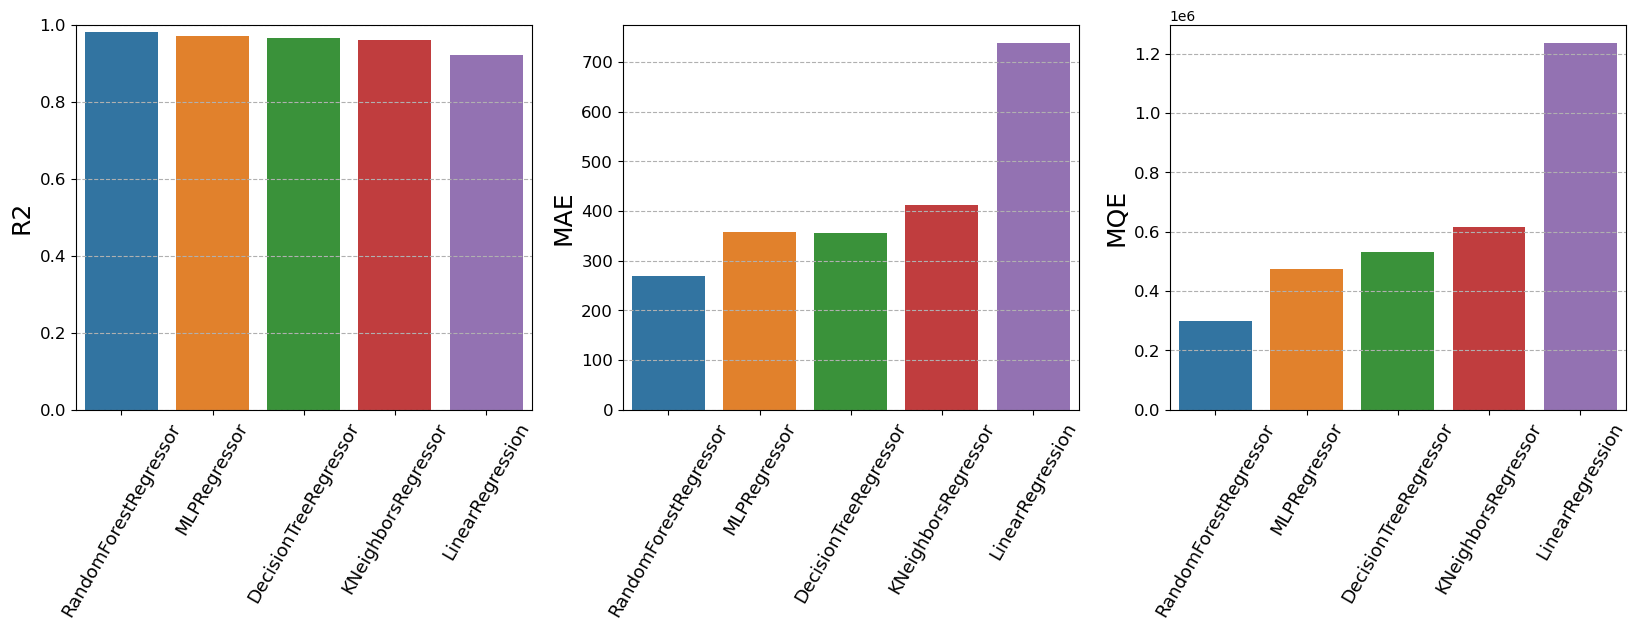

,model,data,R2,mean_absolute_error,mean_square_error
1,RandomForestRegressor,test,0.981,269,298190
2,MLPRegressor,test,0.970,357,473725
3,DecisionTreeRegressor,test,0.966,355,532514
4,KNeighborsRegressor,test,0.961,411,617244
5,LinearRegression,test,0.922,738,1235912


In [40]:
regression_analysis(df_results)

#  Features importance analysis

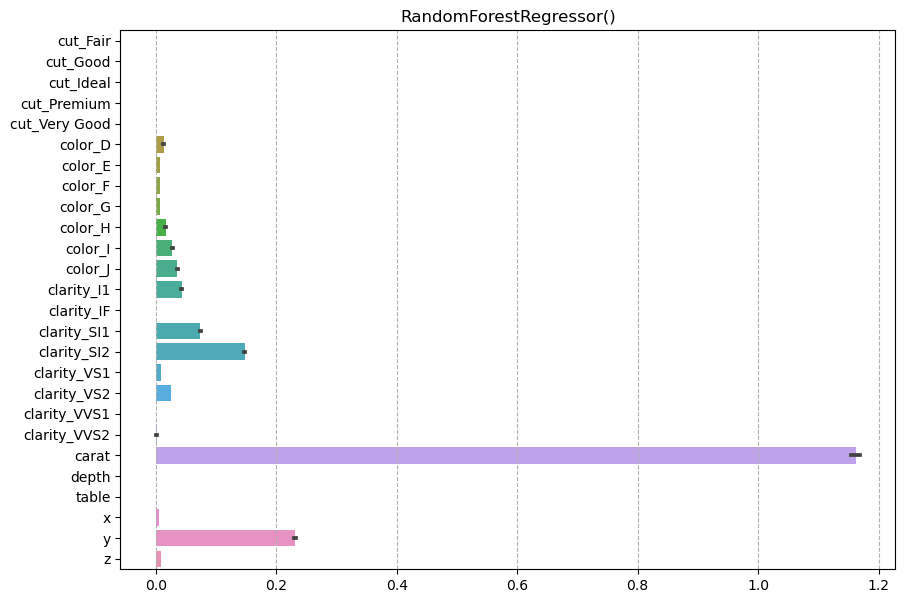

In [41]:
features_importance(model_RFR, X_test, y_test, 10)

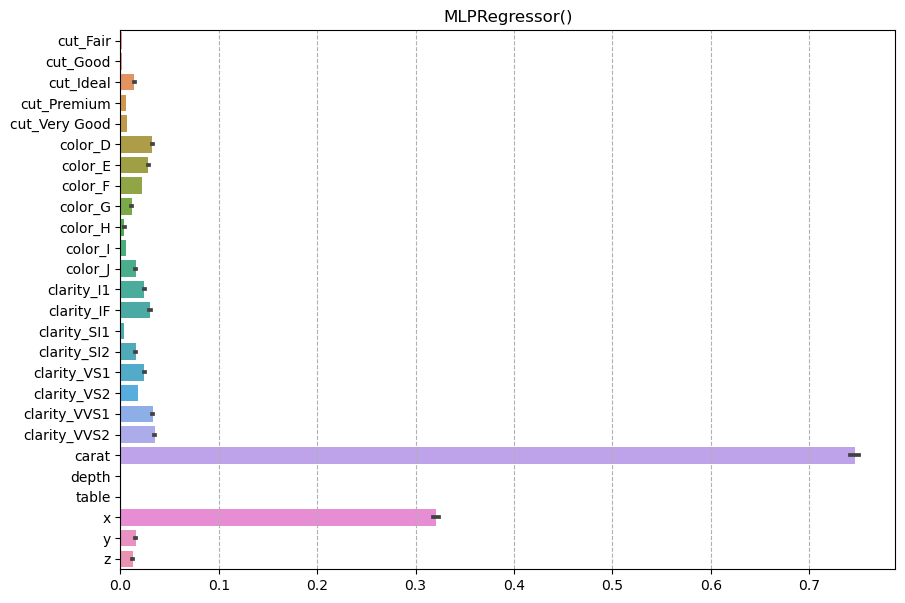

In [42]:
features_importance(model_MLPR, X_test, y_test, 10)

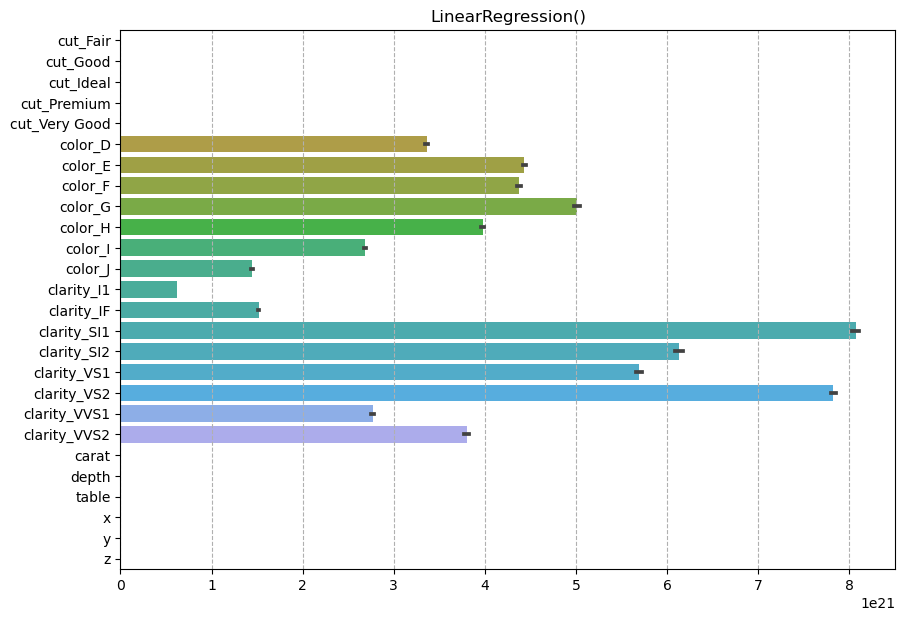

In [43]:
features_importance(model_LG, X_test, y_test, 10)

# Cross validation model analysis

test R2 score: worst=0.822, best=0.941, avarage=0.918
train R2 score: worst=0.919, best=0.92, avarage=0.919


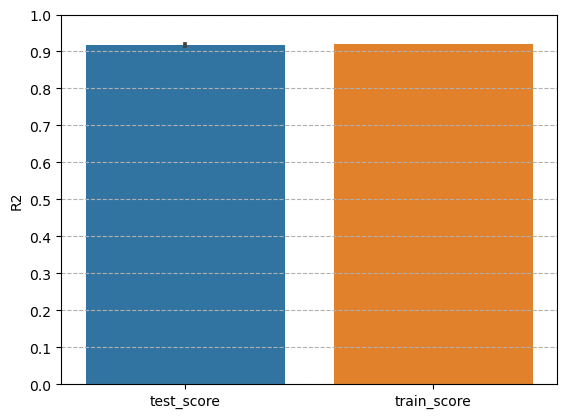

In [44]:
cross_validation(model_LG, X_train, y_train, cv=100)

/opt/conda/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:

/opt/conda/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:

/opt/conda/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:

test R2 score: worst=0.794, best=0.981, avarage=0.965
train R2 score: worst=0.968, best=0.97, avarage=0.969


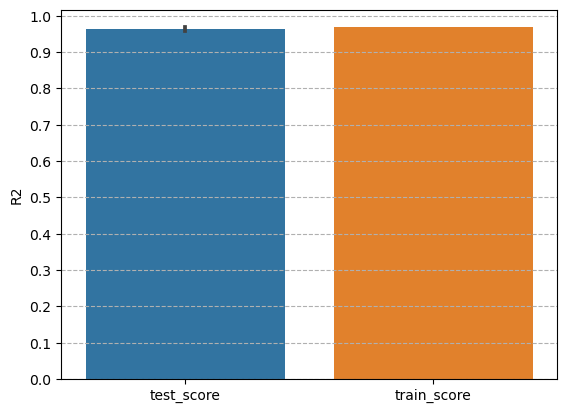

In [45]:
cross_validation(model_MLPR, X_train, y_train, cv=100)